In [8]:
import gensim.downloader as api

# nltk.download("stopwords")
# nltk.download("punkt")

print("loading dataset...")
wv = api.load("word2vec-google-news-300")
print("done!")

loading dataset...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
done!


In [9]:
print(wv.most_similar("facebook"))

[('Facebook', 0.7563532590866089), ('FaceBook', 0.7076999545097351), ('twitter', 0.6988552212715149), ('myspace', 0.6941817998886108), ('Twitter', 0.664244532585144), ('twitter_facebook', 0.6572229862213135), ('Facebook.com', 0.6529868245124817), ('myspace_facebook', 0.6370643973350525), ('facebook_twitter', 0.6367617845535278), ('linkedin', 0.6356593370437622)]


In [10]:
import nltk
import re
import string
# from autocorrect import Speller

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

sw = set(stopwords.words('english'))
ps = PorterStemmer()
# spell = Speller()

def clean_text(text):
    """Pre-process text and generate tokens

    Args:
        text: Text to tokenize.

    Returns:
        Tokenized text.
    """
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    # text = spell(text)
    tokens = text.split()
    tokens = [t for t in tokens if not t in sw]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    # tokens = [ps.stem(token) for token in tokens]

    # print(" ".join(tokens))
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chayapatr/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
import numpy as np

def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model:
                try:
                    vectors.append(model[token])
                except KeyError:
                    continue
            else:
              print(token)
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

shitfest
don’t
tiktok
tiktok
redditors
redditors
redditors
iandeldkeccomoolihatwldn
deak
ciilpsithhin6
exlanzngnittioutwithiout
scta
3grow
yoou
joop
dritz
stoooooop
iiit
isnt
thesarus
splittin
minecraft
kendelr
12m
ratiod
redditors
it’s
y’all
doesn’t
schindlers
tvtyfxhhottosando
67ztoosutaa
torra
deira
uic
kovac
kenton
dench
mw3
aetherum
doesnt
doesnt
reeeed
yuuuuum
y’all
scoobidi
tiddygothfemboyata
youtuber
yakub
dafuqpbooml
cringiest
gametogenesis
reuited
goty
ubisoft
6siege
ubisoft
townsville
doughnut
elon
elon
greendale
shantae
rawr
genz
skibbidy
csino
gei
bets5
sojincopjcdre
bundes
lgupremaleaquenbaenglsh
ocu
skete
ootb
uchar
s20
rnews
rworldnews
17k
10h
nutts
iol
trao
1000am
8denovde2023
1746mivisualizacoes
that’s
uaidlewimelauc
💨💨
maryanne
86sov
israels
yss
genz
skibidi
tlou2
sneako
reint
heck3
redstone
zegler
snowwhite
bulter
mib
completi
sylvie
you’re
sandino
igi
npcs
27th
callies
wasnt
isnt
it’s
attormey
uinanaue7
4i11
ol1
aint
heinz
beanz
heinz
beanz
heinz
beanz
heinz
amtrie

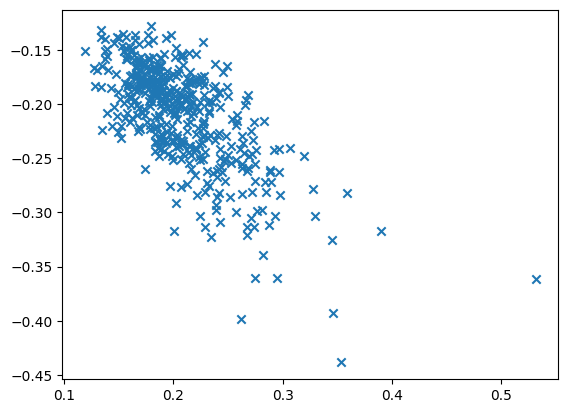

In [14]:
import pandas as pd
# dataset = pd.read_csv('hand-edit.csv')
dataset = pd.read_csv('hand-edit.csv')
docs = [*dataset['embedded']]
vd = vectorize([clean_text(n) for n in docs], wv)

# print([clean_text(n) for n in docs])

import matplotlib.pyplot as plt
#calculate 2d indicators
def indic(data):
    #alternatively you can calulate any other indicators
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    return max, min

x,y = indic(vd)
plt.scatter(x, y, marker='x')
plt.show()

In [19]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_no = 10

def mbkmeans_clusters(
	X,
    k,
    mb,
    print_silhouette_values,
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

clustering, cluster_labels = mbkmeans_clusters(
	X=vd,
    k=cluster_no,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in [clean_text(doc) for doc in docs]],
    "cluster": cluster_labels
})

/Users/chayapatr/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For n_clusters = 10
Silhouette coefficient: -0.12
Inertia:346.18185951643056
Silhouette values:
    Cluster 1: Size:4 | Avg:0.41 | Min:0.21 | Max: 0.50
    Cluster 7: Size:2 | Avg:0.27 | Min:0.15 | Max: 0.38
    Cluster 0: Size:2 | Avg:0.27 | Min:0.21 | Max: 0.32
    Cluster 3: Size:1 | Avg:0.00 | Min:0.00 | Max: 0.00
    Cluster 9: Size:1 | Avg:0.00 | Min:0.00 | Max: 0.00
    Cluster 4: Size:15 | Avg:-0.09 | Min:-0.20 | Max: -0.01
    Cluster 6: Size:112 | Avg:-0.12 | Min:-0.22 | Max: -0.03
    Cluster 5: Size:52 | Avg:-0.12 | Min:-0.22 | Max: 0.00
    Cluster 8: Size:90 | Avg:-0.14 | Min:-0.27 | Max: -0.04
    Cluster 2: Size:151 | Avg:-0.14 | Min:-0.29 | Max: -0.03


In [18]:
print("Most representative terms per cluster (based on centroids):")
for i in range(cluster_no):
    tokens_per_cluster = ""
    most_representative = wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: dayum jennajameson_@ hollyrpeete_@ Ewwwww JeremyShockey_@ 
Cluster 1: UDBKL %_#F########_7v.jsn Pacgen_Reports Components_www.danaher.com %_#F########_3v.jsn 
Cluster 2: By_Jonas_Elmerraji %_#F########_9v.jsn By_Laurelle_Gilbert %_#F########_7v.jsn UDBKL 
Cluster 3: E_mail_heyjen@phillynews.com Cassell_chirped Chiddy_Bang_maybe pioneer_LaLanne SERENA_WILLIAMS_Well 
Cluster 4: By_Laurelle_Gilbert screwball_ruse By_Jonas_Elmerraji viral_McSween By_Elise_Viebeck 
Cluster 5: racism racisim institutionalized_racism racist classism 
Cluster 6: %_#F########_7v.jsn %_#F########_9v.jsn %_#F########_3v.jsn By_Jonas_Elmerraji sanctuary_DellaBianca 
Cluster 7: depression AdrianneCurry_@ Tonight_Vanish JeremyShockey_@ hollyrpeete_@ 
Cluster 8: dont AdrianneCurry_@ SheldenWilliams_@ JeremyShockey_@ cant 
Cluster 9: JeremyShockey_@ samantharonson_@ SheldenWilliams_@ hollyrpeete_@ jennajameson_@ 
